# Simple Linear Regression Part-3 | Regression Metrics

In [166]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv('placement.csv')

In [168]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

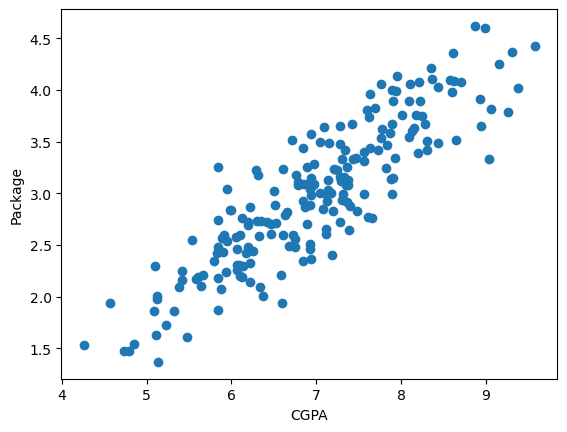

In [169]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [170]:
X = df['cgpa']
X

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64

In [171]:
y = df['package']

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [173]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [174]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [175]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package')

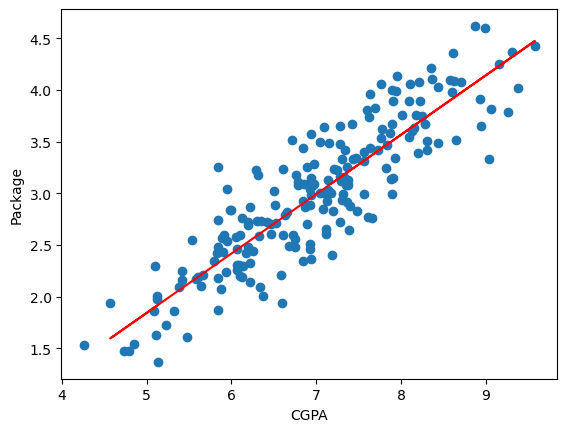

In [176]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [178]:
lr.predict(X_test)

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [179]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [180]:
y_pred = lr.predict(X_test)

In [181]:
print('MAE: ', mean_absolute_error(y_test,y_pred))

MAE:  0.23150985393278373


In [182]:
print('MSE: ', mean_squared_error(y_test,y_pred))

MSE:  0.08417638361329657


In [183]:
print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE:  0.2901316659954521


In [184]:
print('R2 score: ',r2_score(y_pred,y_test))

R2 score:  0.733797338294438


### Adjusted R2 score

In [185]:
X_test.shape

(40, 1)

In [186]:
r2 = r2_score(y_pred,y_test)

In [187]:
1-((1-r2)*(40-1)/(40-1-1))

0.7267920050916601

In [198]:
# adding new columns 
new_df = df.copy()

In [189]:
new_df['random_feature'] = np.random.random(size=len(new_df))  
new_df = new_df[['cgpa', 'random_feature', 'package']]

In [190]:
new_df.head()

,cgpa,random_feature,package
0,6.89,0.227958,3.26
1,5.12,0.847453,1.98
2,7.82,0.775916,3.25
3,7.42,0.524447,3.67
4,6.94,0.886606,3.57


Text(0, 0.5, 'Package')

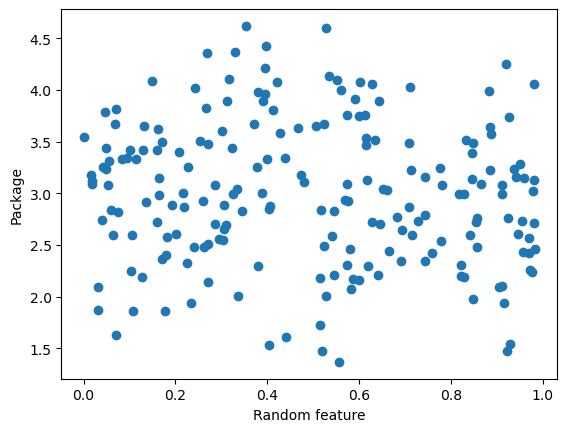

In [191]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('Random feature')
plt.ylabel('Package')

In [192]:
X = new_df.drop('package',axis=1)
y=new_df['package']

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [194]:
lr.fit(X_train,y_train)

LinearRegression()

In [195]:
y_pred = lr.predict(X_test)

In [196]:
print('R2 score: ', r2_score(y_pred,y_test))

R2 score:  0.7267861124474104


In [197]:
r2 = r2_score(y_pred,y_test)
1- ((1-r2)*(40-1)/(40-1-1))

0.7195962733012897

In [199]:
# adding new column

new_df2 = df.copy()

In [200]:
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [201]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.36,3.26
1,5.12,2.38,1.98
2,7.82,4.15,3.25
3,7.42,3.77,3.67
4,6.94,4.37,3.57


Text(0, 0.5, 'Package')

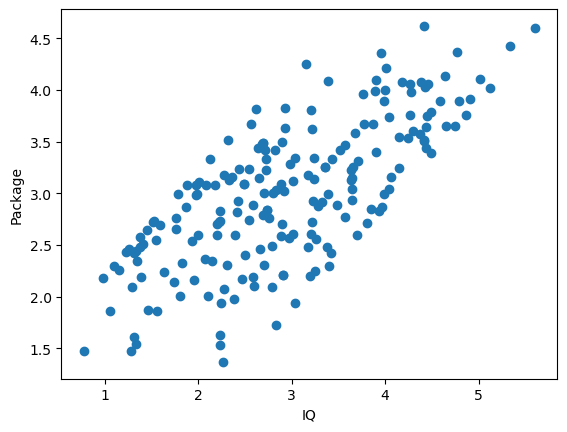

In [203]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('Package')

In [204]:
X = new_df2.drop('package',axis=1)
y = new_df2['package']

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =42)

In [207]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [208]:
r2 = r2_score(y_pred,y_test)
r2

0.7597267814590233

In [209]:
1- ((1-r2)*(40-1)/(40-1-1))

0.7534038020237344